In [1]:
%load_ext autoreload
%autoreload 2

In [67]:
from smearly.ml_logic.preprocessing import resize_pad_image_tf, image_file_to_tf
import matplotlib.pyplot as plt
import tensorflow as tf

(224, 224, 3)


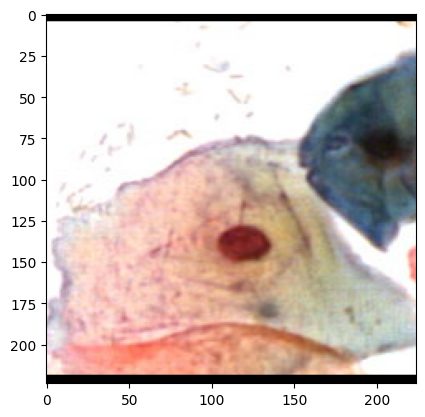

In [68]:
# Read the image file
img = image_file_to_tf('../raw_data/healthy/isbi2025_ps3c_train_image_03449.png')

img_resized = resize_pad_image_tf(img)
print(img_resized.shape)
plt.imshow(img_resized);

In [70]:
import os

# Specify the directory path
directory_path = '../raw_data/bothcells'

# Filter out only the files (not directories)
file_names = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

print(len(file_names))

for file_name in file_names:
    shape = resize_pad_image_tf(image_file_to_tf(os.path.join(directory_path, file_name))).shape
    if shape != (224, 224, 3):
        print(shape)

3448


In [71]:
from smearly.ml_logic.preprocessing import create_image_dataset
create_image_dataset('../raw_data')

Found 85080 files belonging to 5 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

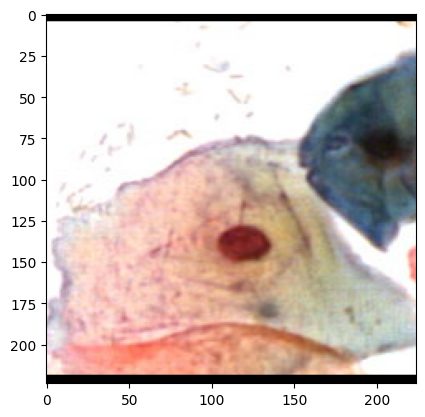

In [14]:
# Create a custom transformer using FunctionTransformer
resize_pad_transformer = FunctionTransformer(resize_pad_image_tf)

# Create a pipeline with your custom preprocessing function and a model
pipeline = make_pipeline(resize_pad_transformer)


new_img = pipeline.transform(img)
plt.imshow(new_img);

In [ ]:
from smearly.ml_logic.preprocessing import create_image_dataset

directory_path = '../raw_data/'

img_ds = create_image_dataset(directory_path)

Found 85080 files belonging to 5 classes.


AttributeError: '_PrefetchDataset' object has no attribute 'shape'

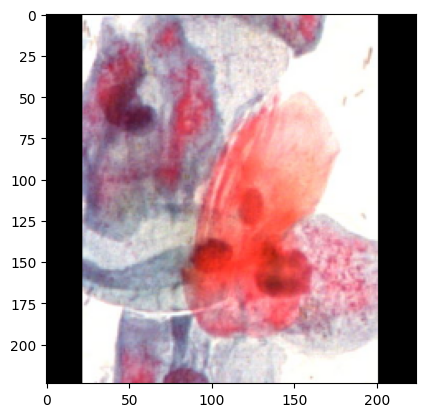

In [95]:
for img, label in img_ds.take(1):
    plt.imshow(img[1]/255)
    break

In [43]:
import random
l = list(range(10))

random.seed(42)
random.shuffle(l)
l[:3]

[7, 3, 2]

In [82]:
import os
import sys
import random
import pprint

# Specify the directory path
directory_path = '../raw_data'

subdirs = [f for f in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, f))]

nb_files_per_class = {
    'bothcells': 6,
    'healthy': 2,
    'unhealthy': 3,
    'rubbish': 3,
    'temp': 2
}

random.seed(42)
files_picked = {}
for subdir in subdirs:
    if subdir in nb_files_per_class:
        file_names = [f for f in os.listdir(os.path.join(directory_path, subdir)) if os.path.isfile(os.path.join(directory_path, subdir, f))]
        nb_files_to_pick = nb_files_per_class[subdir]
        nb_file_names = len(file_names)
        if nb_files_to_pick > nb_file_names:
            print(f'[Warning] You asked for {nb_files_to_pick} files in {subdir} which contains only {nb_file_names} file(s)', file=sys.stderr)
            print(f'Reducing number of picked files to the maximum: {nb_file_names} file(s)', file=sys.stderr)
            nb_files_to_pick = nb_file_names

        files_picked[subdir] = random.sample(file_names, nb_files_to_pick)

pprint.pprint(files_picked)

[Warning] You asked for 2 files in temp which contains only 1 file(s)
Reducing number of picked files to the maximum: 1 file(s)


{'bothcells': ['isbi2025_ps3c_train_image_01268.png',
               'isbi2025_ps3c_train_image_00473.png',
               'isbi2025_ps3c_train_image_00118.png',
               'isbi2025_ps3c_train_image_00304.png',
               'isbi2025_ps3c_train_image_03231.png',
               'isbi2025_ps3c_train_image_02249.png'],
 'healthy': ['isbi2025_ps3c_train_image_22818.png',
             'isbi2025_ps3c_train_image_30080.png'],
 'rubbish': ['isbi2025_ps3c_train_image_48084.png',
             'isbi2025_ps3c_train_image_65532.png',
             'isbi2025_ps3c_train_image_66536.png'],
 'temp': ['fake_file'],
 'unhealthy': ['isbi2025_ps3c_train_image_83558.png',
               'isbi2025_ps3c_train_image_83465.png',
               'isbi2025_ps3c_train_image_83637.png']}
